# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [ ]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [ ]:
env = UnityEnvironment(file_name="Tennis.app")

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [ ]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

In [ ]:
actions.shape

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [1]:

from unityagents import UnityEnvironment
import numpy as np
import torch
import sys
import argparse
from collections import deque
from ddpg_agent import Agent
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = UnityEnvironment(file_name="Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


In [5]:
states

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -6.65278625, -1.5       , -0.        ,  0.        ,
         6.83172083,  6.        , -0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -6.4669857 , -1.5       ,  0.        ,  0.        ,
        -6.83172083,  6.        ,  0.        ,  0.        ]])

In [6]:
agent_1 = Agent(state_size=state_size, action_size=action_size, random_seed=2)


scores_deque = deque(maxlen=print_every)
scores = []
for i_episode in range(1, n_episodes + 1):
    env_info = env.reset(train_mode=True)[brain_name]
    states = env_info.vector_observations
    agent.reset()
    score = np.zeros(num_agents)
    for t in range(max_t):
        actions = agent.act(states, True)
        env_info = env.step(actions)[brain_name]
        next_states, rewards, dones = env_info.vector_observations, env_info.rewards, env_info.local_done
        # print(next_states.shape)
        for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
            # print(done)
            agent.step(state, action, reward, next_state, done, t)
        states = next_states
        score += rewards
        if np.any(done):  # exit loop if episode finished
            break
    scores_deque.append(np.mean(score))
    scores.append(np.mean(score))
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
    if i_episode % print_every == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')

NameError: name 'print_every' is not defined

In [ ]:
states = env_info.vector_observations   

In [ ]:
np.expand_dims(states[0],0).shape

In [5]:
agent_1 = Agent(state_size=state_size, action_size=action_size, random_seed=2)
agent_2 = Agent(state_size=state_size, action_size=action_size, random_seed=3)


In [6]:
agent_2.memory = agent_1.memory
agent_2.actor_local=agent_1.actor_local
agent_2.actor_target=agent_1.actor_target
agent_2.critic_local=agent_1.critic_local
agent_2.critic_target=agent_1.critic_target

In [16]:
a1 = agent_1.act(np.expand_dims(states[0],0))

In [17]:
a1

array([[ 0.17204551, -0.1421592 ]], dtype=float32)

In [18]:
a2 = agent_1.act(np.expand_dims(states[1],0))

In [19]:
np.concatenate((a1, a2))

array([[ 0.17204551, -0.1421592 ],
       [ 0.20474789, -0.09010214]], dtype=float32)

In [8]:
n_episodes=5000
t_max = 1000
print_every=100
maxlen=100

score = []
ev_score = []
scores_deque = deque(maxlen=maxlen)
for i_episode in range(1, n_episodes + 1):                                    # play game for 5 episodes
    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    agent_1.reset()
    agent_2.reset()   
    for t in range(t_max):     
        actions_1 = agent_1.act(np.expand_dims(states[0],0), True)
        actions_2 = agent_2.act(np.expand_dims(states[1],0), True)
        #actions_1 = np.clip(actions_1, -1, 1)             # all actions between -1 and 1
        actions = np.concatenate((actions_1, actions_2))
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        
        next_states, rewards, dones = env_info.vector_observations, env_info.rewards, env_info.local_done
        #for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
        agent_1.step(np.expand_dims(states[0],0), actions_1, rewards[0], np.expand_dims(next_states[0],0), dones[0], t)
        agent_2.step(np.expand_dims(states[1],0), actions_2, rewards[1], np.expand_dims(next_states[1],0), dones[1], t)
        
        scores += rewards                                  # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
        
    score.append(np.max(scores))
    ev_score.append(np.mean(scores_deque))
    scores_deque.append(np.max(scores))
    print('Score (max over agents) from episode {}: {:.5f}'.format(i_episode, np.max(scores)), end='\r')
    if i_episode % print_every == 0 or np.mean(scores_deque)>0.5:
        print('\n Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque)>0.5:
            print("\n Environment solved!")
            #torch.save(agent_1.actor_local.state_dict(), 'checkpoint_actor_1.pth')
            #torch.save(agent_2.actor_local.state_dict(), 'checkpoint_actor_2.pth')
            #torch.save(agent_1.critic_local.state_dict(), 'checkpoint_critic_1.pth')
            #torch.save(agent_2.critic_local.state_dict(), 'checkpoint_critic_2.pth')

    

/Users/d065820/anaconda2/envs/drlnd/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/d065820/anaconda2/envs/drlnd/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/Users/d065820/Projects/RL_nanodegree/deep-reinforcement-learning/p3_collab-compet/ddpg_agent.py:108: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Score (max over agents) from episode 100: 0.00000
 Episode 100	Average Score: 0.00
Score (max over agents) from episode 200: 0.00000
 Episode 200	Average Score: 0.00
Score (max over agents) from episode 300: 0.00000
 Episode 300	Average Score: 0.00
Score (max over agents) from episode 400: 0.00000
 Episode 400	Average Score: 0.00
Score (max over agents) from episode 500: 0.10000
 Episode 500	Average Score: 0.06
Score (max over agents) from episode 600: 0.00000
 Episode 600	Average Score: 0.02
Score (max over agents) from episode 700: 0.09000
 Episode 700	Average Score: 0.04
Score (max over agents) from episode 800: 0.10000
 Episode 800	Average Score: 0.02
Score (max over agents) from episode 900: 0.10000
 Episode 900	Average Score: 0.09
Score (max over agents) from episode 1000: 0.10000
 Episode 1000	Average Score: 0.10
Score (max over agents) from episode 1100: 0.10000
 Episode 1100	Average Score: 0.09
Score (max over agents) from episode 1200: 0.29000
 Episode 1200	Average Score: 0.1

Score (max over agents) from episode 1540: 1.20000
 Episode 1540	Average Score: 0.86

 Environment solved!
Score (max over agents) from episode 1541: 0.39000
 Episode 1541	Average Score: 0.86

 Environment solved!
Score (max over agents) from episode 1542: 1.09000
 Episode 1542	Average Score: 0.87

 Environment solved!
Score (max over agents) from episode 1543: 0.10000
 Episode 1543	Average Score: 0.85

 Environment solved!
Score (max over agents) from episode 1544: 0.19000
 Episode 1544	Average Score: 0.85

 Environment solved!
Score (max over agents) from episode 1545: 1.10000
 Episode 1545	Average Score: 0.86

 Environment solved!
Score (max over agents) from episode 1546: 0.10000
 Episode 1546	Average Score: 0.83

 Environment solved!
Score (max over agents) from episode 1547: 0.49000
 Episode 1547	Average Score: 0.83

 Environment solved!
Score (max over agents) from episode 1548: 0.30000
 Episode 1548	Average Score: 0.83

 Environment solved!
Score (max over agents) from episode 

KeyboardInterrupt: 

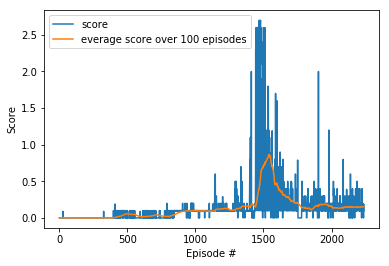

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(score)+1), score, label="score")
plt.plot(np.arange(1, len(ev_score)+1), ev_score, label="everage score over 100 episodes")
plt.ylabel('Score')
plt.xlabel('Episode #')

plt.legend()
plt.show()

In [9]:
fig.savefig('scores.jpeg', format='jpeg', bbox_inches="tight",  dpi=300, pad_inches=0, frameon=False)

NameError: name 'fig' is not defined

In [7]:
agent_2.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent_1.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent_1.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))
agent_2.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

In [8]:
n_episodes=5000
t_max = 1000
print_every=100
maxlen=100

scores_deque = deque(maxlen=maxlen)
for i_episode in range(1, n_episodes + 1):                                    # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    agent_1.reset()
    agent_2.reset()   
    for t in range(t_max):     
        actions_1 = agent_1.act(np.expand_dims(states[0],0), True)
        actions_2 = agent_2.act(np.expand_dims(states[1],0), True)
        #actions_1 = np.clip(actions_1, -1, 1)             # all actions between -1 and 1
        actions = np.concatenate((actions_1, actions_2))
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states, rewards, dones = env_info.vector_observations, env_info.rewards, env_info.local_done
        scores += rewards                                  # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
            
    scores_deque.append(np.max(scores))
    print('Score (max over agents) from episode {}: {:.5f}'.format(i_episode, np.max(scores)), end='\r')
    

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

INFO:root:
Unfortunately, your original traceback can not be constructed.



Traceback (most recent call last):
  File "/Users/d065820/anaconda2/envs/drlnd/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-b681fde24120>", line 18, in <module>
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
  File "/Users/d065820/anaconda2/envs/drlnd/lib/python3.6/site-packages/unityagents/environment.py", line 369, in step
    self._generate_step_input(vector_action, memory, text_action)
  File "/Users/d065820/anaconda2/envs/drlnd/lib/python3.6/site-packages/unityagents/rpc_communicator.py", line 78, in exchange
    output = self.unity_to_external.parent_conn.recv()
  File "/Users/d065820/anaconda2/envs/drlnd/lib/python3.6/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/Users/d065820/anaconda2/envs/drlnd/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf

KeyboardInterrupt: 

In [ ]:
for i in range(1, 6):      
    print(i)